## **Deep Learning with TensorFlow 1.0 (Python) !**
 > Deep Learning을 이해하기 위해 인터넷강의를 통해 공부하고, TensorFlow 1.0으로 직접 구현해보면서
 학습한 내용을 토대로 작성되었다.
 이 자료를 통해 기초적인 Machine Learning에 대한 개념과 Deep Learning을 이해하고, 실제 데이터에 대한 예측 모델을 구성해볼 수 있다.
 
*참고자료* :  
*[김성훈 님][https://github.com/hunkim]*

## **====== Contents ======**

### 0. Machine Learning Basic concepts
### 1. Linear Regression
    1-1 Linear Regression (Tensorflow)
    1-2 Linear Regression (Cost Function이 Convex 할까?)
    1-3 Linear Regression (Multi-variable은 어떻게 계산할까? - 행렬연산)
### 2. Logistic Regression (classification)
    2-1 Logistic Regression (Tensorflow)
    2-2 Softmax Classification
### 3. NN (Neural Network)
    3-1 XOR Problem (Linear Regression, Neural Network)
    3-2 XOR with Deep-Wide Learning (Vanishing gradient)
    (Bonus) 실제 데이터를 사용하기 전 알아야할 개념
### (실습1) 다양한 모델을 이용한 MNIST 예측하기
    실습1-1) Logistic Classification (Regression)
    실습1-2) Logistic Classification (Softmax)
    실습1-3) Deep + Wide NN
    실습1-4) ReLU, Xavier, Dropout, AdamOptimizer
### 4. CNN (Convolutional N.N.)
### (실습2) CNN을 이용하여 MNIST 이미지 인식률 향상
### 5. RNN (Recurrent N.N.)

## 0. Machine Learning Basic concepts
![Machine Learning](Image/image1.jpg)

In [6]:
# Getting Started With TensorFlow
# https://www.tensorflow.org/get_started/get_started

import tensorflow as tf

## 1. Check TF Verison
print(" #1. Check TF Version")
print(tf.__version__)

## 2. Hello Tensorflow
# Create a constant op
# This op is added as a node to the default graph
print("\n #2. Hello Tensorflow")
hello = tf.constant("Hello, TensorFlow!")
# start a TF session
sess = tf.Session()
# run the op and get result
print(sess.run(hello))

## 3. Computational Graph
print("\n #3. Computational Graph")
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
node3 = tf.add(node1, node2)

print("node1:", node1)
print("node2:", node2)
print("node3: ", node3)

sess = tf.Session()
print("sess.run(node1, node2): ", sess.run([node1, node2]))
print("sess.run(node3): ", sess.run(node3))

## 4. Placeholder
print("\n #4. Placeholder")
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b  # + provides a shortcut for tf.add(a, b)

print(sess.run(adder_node, feed_dict={a: 3, b: 4.5}))
print(sess.run(adder_node, feed_dict={a: [1,3], b: [2, 4]}))

 #1. Check TF Version
1.12.0

 #2. Hello Tensorflow
b'Hello, TensorFlow!'

 #3. Computational Graph
node1: Tensor("Const_10:0", shape=(), dtype=float32)
node2: Tensor("Const_11:0", shape=(), dtype=float32)
node3:  Tensor("Add_6:0", shape=(), dtype=float32)
sess.run(node1, node2):  [3.0, 4.0]
sess.run(node3):  7.0

 #4. Placeholder
7.5
[3. 7.]


## 1. Linear Regression

> Linear Regression은 종속 변수 Y와 한 개 이상의 독립 변수 X와의 선형 상관 관계를 모델링하는 회귀분석 기법이다.

![Machine Learning](Image/image2.jpg)

* **Hypothesis**
  
  Weight * Features 에 해당하는 모델을 구성한다.

* **Cost Function**

  Hypothesis에 할당된 Weight값에 의해 어떤 Cost(Loss)를 가지는지 계산하는 함수이며 이 Cost Function 
  이 최소화하는 Weight들을 검색하는 것이 우리의 목표이다.

* **Gradient descent algorithm**

  Cost를 최소화하기 위해 cost(W)에 대해 편미분한 값을 이용하여 최저점을 탐색하는 알고리즘

* **Convex function**

  볼록한 형태의 함수로, Local minimum에 빠지지 않고, 미분한 값이 0에 가까울수록 Global Minimum에 해당하는 값을 도출할 수 있는 형태이다. Cost Function이 이 형태를 띄어야 학습이 제대로 동작할 수 있다.

#### 1-1 Linear Regression (Tensorflow)

In [56]:
# 1-1. Linear Regression (Tesorflow)

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Traning Set
X_data = [1, 2, 3, 4, 5]
Y_data = [2.1, 3.1, 4.1, 5.1, 6.1]

# Variable : Tensorflow상에서 학습되는 Weight로 Graph Run되면 자동으로 값을 찾는다.
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

# Hyposthesis
hypothesis = X * W + b
# Linear regression Cost Function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

print("# 1-1. Linear Regression (Tesorflow). Learing Started.")
#Learning
for step in range(501):
    cost_val, w_val, b_val, _ = sess.run([cost,W,b,train], 
                                         feed_dict={X: X_data,
                                                    Y: Y_data})
    if(step % 50 == 0):
        print("Step : %d, Cost : %.5f, [W, b] = [%.3f, %.3f]" % (step, cost_val, w_val, b_val))

# Testing our model
print(sess.run(hypothesis, feed_dict={X:[5]}))
print(sess.run(hypothesis, feed_dict={X:[2.5]}))
print(sess.run(hypothesis, feed_dict={X:[1.5, 3.5]}))

# 1-1. Linear Regression (Tesorflow). Learing Started.
Step : 0, Cost : 28.97908, [W, b] = [-0.029, 0.341]
Step : 50, Cost : 0.02526, [W, b] = [1.103, 0.729]
Step : 100, Cost : 0.01801, [W, b] = [1.087, 0.787]
Step : 150, Cost : 0.01283, [W, b] = [1.073, 0.835]
Step : 200, Cost : 0.00915, [W, b] = [1.062, 0.877]
Step : 250, Cost : 0.00652, [W, b] = [1.052, 0.911]
Step : 300, Cost : 0.00465, [W, b] = [1.044, 0.941]
Step : 350, Cost : 0.00331, [W, b] = [1.037, 0.966]
Step : 400, Cost : 0.00236, [W, b] = [1.031, 0.987]
Step : 450, Cost : 0.00168, [W, b] = [1.027, 1.004]
Step : 500, Cost : 0.00120, [W, b] = [1.022, 1.019]
[6.131133]
[3.575126]
[2.5527232 4.5975285]


#### 1-2 Linear Regression (Cost Function이 Convex 할까?)

# 1-2 Linear Regression (Cost Function이 Convex 할까?)


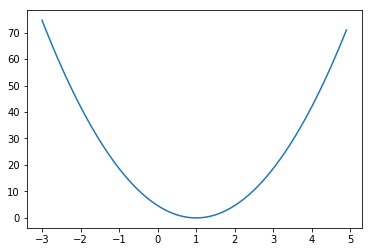

In [58]:
# 1.2 Linear Regression
# Cost Function이 Convex function인지 확인하기

import tensorflow as tf
import matplotlib.pyplot as plt

X=[1,2,3]
Y=[1,2,3]

W=tf.placeholder(tf.float32)

hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis-Y))

sess= tf.Session()
sess.run(tf.global_variables_initializer())

W_val=[]
cost_val=[]

print("# 1-2 Linear Regression (Cost Function이 Convex 할까?)")
for i in range(-30, 50):
    feed_W = i*0.1
    curr_cost, curr_W = sess.run([cost,W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

# Show the cost function
plt.plot(W_val, cost_val)
plt.show()

#### 1-3 Linear Regression (Multi-variable은 어떻게 계산할까? - 행렬연산)
![Multi-variable](Image/image3.jpg)

In [59]:
# 1.3 Linear Regression
# Multi-Variable인 경우에도 학습하기

import tensorflow as tf

x_data = [[73, 80, 75], [93, 88, 93], [89, 91, 90], [96,98, 100], [73, 66, 70]]
y_data = [[152], [185], [180], [196], [142]]

# [None, 3] : 주어지는 데이터가 N개 이며, X 종류(Features)는  3개
X = tf.placeholder(tf.float32, shape=[None, 3]) # X1 ~ X3 : 3
Y = tf.placeholder(tf.float32, shape=[None, 1]) # Y1 : 1

W = tf.Variable(tf.random_normal([3, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
hypothesis = tf.matmul(X, W) + b
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train  = optimizer.minimize(cost)

#launch the graph in a session
sess= tf.Session()
sess.run(tf.global_variables_initializer())

print("# 1.3 Linear Regression(Multi-Variable) Learing Started.")
for step in range(1001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict={X : x_data, Y : y_data })
    if(step % 200 == 0):
        print("Step : %d, cost : %.5f," % (step, cost_val),"Hypothesis: ", hy_val)

# 1.3 Linear Regression(Multi-Variable) Learing Started.
Step : 0, cost : 79654.64062, Hypothesis:  [[ -96.312805]
 [-118.1729  ]
 [-115.168945]
 [-125.842766]
 [ -90.363205]]
Step : 200, cost : 3.64365, Hypothesis:  [[153.95853]
 [182.91168]
 [181.35086]
 [197.07372]
 [139.34601]]
Step : 400, cost : 3.29232, Hypothesis:  [[153.81964]
 [183.00717]
 [181.30864]
 [197.04068]
 [139.47342]]
Step : 600, cost : 2.97706, Hypothesis:  [[153.68811]
 [183.09756]
 [181.26865]
 [197.00928]
 [139.59413]]
Step : 800, cost : 2.69411, Hypothesis:  [[153.56358]
 [183.18318]
 [181.2308 ]
 [196.97945]
 [139.70856]]
Step : 1000, cost : 2.44019, Hypothesis:  [[153.44571]
 [183.26425]
 [181.195  ]
 [196.95111]
 [139.81702]]


### 2. Logistic Regression (classification)

> Logistic Regression은 일반적인 회귀 분석의 목표와 동일하게 종속 변수와 독립 변수간의 관계를 구체적인 함수로 나타내어 향후 예측 모델에 사용하는 것이다. Logistic Regression에서는 종속 변수가 범주형 데이터로 Classification 기법으로 생각하면 된다. Tensorflow에서는 각 범주형 데이터일 값을 구하는 Regression과 각 범주형 데이터의 확률로 표기하는 Classification으로 구할 것이다.

![](Image/image4.jpg)

* **Classification**

  데이터를 분류함에 있어서 YES or No (1,0) 둘 중 하나를 분류하는 것을 Binary classification이라 불리며, N개의 범주로 분류되는 것을 Multinomial classfication이라고 한다.
  
* **Logistic Hypothesis**

  Logictic은 Linear Hypothesis 모델을 그대로 이용할 경우 매우 큰 값/작은 값에 평균 값이 크게 달라지는 현상을 보이기 때문에, 데이터를 학습할 때 특이 케이스에 의해 동작이 잘 되지 않는다. 이때에도 잘 동작할 수 있게 하는 것이 매우 큰 이슈였는데, Sigmoid라는 함수를 한번 더 통과함으로써 효과적으로 동작할 수 있다. 이 값은 항상 0~1 사이의 값을 가진다.
  
* **Cost Function**

  Cost Function 또한 그래프처럼 Convex 형태를 띄지 않아 학습이 되지 않는다. 이를 보완하기 위해 X가 지수에 있는 것을 상쇄하기 위해, log을 취한 형태로 Logistic을 위한 새로운 Cost Function을 사용한다. 이 Cost Function을 다시 Gradient decent algorithm을 적용하면 Cost를 최소화할 수 있다.
  
  
  #  
  

![](Image/image5.jpg)
* **Multinomial Classifiaction**
 
  Multinomial Classification은 사실 Binary를 N번 구하는 것으로 구할 수 있다. 이를 행렬곱을 이용하면 쉽게 N번을 연산할 수 있게 된다. 각각의 Score를 계산할 수 있다.
  
* **Softmax**

  Binary Classification에서는 Score에 대해 Sigmoid를 취하면서 0~1 사이의 값을 가지도록 하여 결정하였는데, Multinomial Classification에서 N번 Sigmoid를 취해도 되지만 더 간단한 방법으로 Softmax로 처리할 수 있다. 심지어 Softmax의 결과값이 총합이 1이어서, 각각 경우의 확률과 같다.
  
* **Cross entropy**

  Softmax의 Cost function으로 실제 Y값과 -log(Y 예측값)을 Elementwise 곱한 후 Sumation한 값이다. Logisitic Cost function과 같은 개념이다. - (이유: Logistic에서 one-hot encoding 벡터로 변환한 후 Cross Entropy를 적용하면 같다)
  

#### 2-1 Logistic Regression (Tensorflow)

In [1]:
# 2-1 Logistic Regression (Tensorflow)

import tensorflow as tf

x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0], [0], [0], [1], [1], [1]]

X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([2, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis using sigmoid : tf.div(1., 1. + tf.exp(tf.matmul(X, W) + b))
hypothesis =  tf.sigmoid(tf.matmul(X, W) + b)  
# Simplified cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis))
# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train  = optimizer.minimize(cost)

# Accuracy computation
# True if hypothesis > 0.5  => sigmoid를 통과한 값이 0.5보다 크면 1로 인식하게 한다.
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32)) * 100 # to %

print("# 2-1 Logistic Regression (Tensorflow) Learing Started.")
#launch the graph in a session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(7001):
        cost_val, _ = sess.run([cost, train], feed_dict={X : x_data, Y : y_data })
        if(step % 1000 == 0):
            a = sess.run([accuracy],feed_dict={X: x_data, Y:y_data})[0]
            print("Step : %4d, Cost: %.5f, Accuracy: %.2f" % (step, cost_val, a), "%")


    #Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],feed_dict={X: x_data, Y:y_data})
    print("\n Hypothesis : ", h, "\nCorrect(Y) : ", c, "\n Accuracy: ", a)

C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWa

# 2-1 Logistic Regression (Tensorflow) Learing Started.
Step :    0, Cost: 1.03770, Accuracy: 33.33 %
Step : 1000, Cost: 0.40463, Accuracy: 83.33 %
Step : 2000, Cost: 0.34070, Accuracy: 83.33 %
Step : 3000, Cost: 0.29437, Accuracy: 83.33 %
Step : 4000, Cost: 0.25807, Accuracy: 83.33 %
Step : 5000, Cost: 0.22916, Accuracy: 100.00 %
Step : 6000, Cost: 0.20577, Accuracy: 100.00 %
Step : 7000, Cost: 0.18658, Accuracy: 100.00 %

 Hypothesis :  [[0.04774142]
 [0.17698301]
 [0.3779481 ]
 [0.7496976 ]
 [0.9178857 ]
 [0.9731891 ]] 
Correct(Y) :  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
 Accuracy:  100.0


#### 2-2 Softmax Classification

In [61]:
# 2-2 Softmax Classification + Fancy Softmax

import tensorflow as tf

x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5], [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]] # one-hot encoding
n_inputs = 4 
n_classes = 3

X = tf.placeholder("float", [None, n_inputs])
Y = tf.placeholder("float", [None, n_classes])
W = tf.Variable(tf.random_normal([n_inputs, n_classes]), name='weight')
b = tf.Variable(tf.random_normal([n_classes]), name='bias')

## 1. Softmax
# # tf.nn.softmax computes softmax activations
# # softmax = exp(logits) / reduce_sum(exp(logits), dim)
# hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
# # Cross entropy cost/loss
# cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
# optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

## 2. Fancy Softmax with cross entropy
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)
cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels= y_data)
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# accuracy
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(y_data, 1)) # [예측값, 실제값] 비교
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) * 100 # %

print("# 2-2 Softmax Classification + Fancy Softmax. Learing Started.")
# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        cost_val, _ = sess.run([cost, optimizer], feed_dict={X: x_data, Y:y_data})
        if (step % 500) == 0:
            a = sess.run(accuracy, feed_dict={X: x_data, Y:y_data})
            print("Step : %4d, Cost: %.5f, Accuracy: %.2f" % (step, cost_val, a), "%")

    # Test & One-hot encoding
    all = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0 , 1]]})
    print(all, sess.run(tf.arg_max(all, 1)))

# 2-2 Softmax Classification + Fancy Softmax. Learing Started.
Step :    0, Cost: 4.26827, Accuracy: 37.50 %
Step :  500, Cost: 0.47780, Accuracy: 75.00 %
Step : 1000, Cost: 0.29798, Accuracy: 87.50 %
Step : 1500, Cost: 0.20561, Accuracy: 100.00 %
Step : 2000, Cost: 0.16757, Accuracy: 100.00 %
[[1.4185148e-02 9.8580486e-01 1.0000229e-05]
 [7.8595561e-01 1.9688424e-01 1.7160088e-02]
 [2.6808090e-08 4.2461287e-04 9.9957532e-01]] [1 0 2]


### 3. NN (Neural Network)

> Neural Network가 등장하게 된 배경과 Neural Network의 Layer를 여러층 두게 될 때 어떻게 학습을 시키는지, 그리고 Machine Learning을 함에 있어서 여태까지 어떤 이슈가 있었는지, 아직 해결안된 문제는 무엇인지 확인해보고자 한다. 먼저 Neural Network의 발전과정을 알아보고, 어떻게 동작하는지 확인해보자.

![](Image/image6.jpg)
![](Image/image7.jpg)

* **Neuron (Activation Functions)**

 우리의 뇌 신경계의 세포인 뉴런을 분석해보면 어떤 특정 전기신호가 Input으로 들어오게 되고 일정값이 넘어가면 활성화가 되는 것을 본따서 Network를 구성하였다. 이때 활성화가 되기 위한 조건을 판단하는 함수를 Activation Function이라고 한다.
 
* **Perceptrons**
 
 Marvin Minsky(인공지능 분야 교수)는 Perceptrons 이라는 책을 통해 XOR 문제를 한가지 Layer로는 절대 풀 수 없음을 수학적으로 증명하고, Multi Layer를 이용하면 XOR 문제를 해결할 수 있으나, 1969년 당시 어느 누구도 각각의 Layer의 Weight를 컴퓨터로 계산할 수 없음을 밝혔다.
  
* **Backpropagation**
 
 1974년도 Paul Werbos 라는 분이 Backpropagation을 소개하면서 Multi Layer의 Weight를 계산할 수 있음을 보였고, 주목받지 못하다가 1986년 Hinton이 다시 한번 발표하였는데 꽤 잘 동작하였다.
  
* **The Problem with Back-Propagation**
   
 Back-Propagation을 이용하여 Multi Layer도 잘 학습되는 듯 하였으나, 적은 Layer에서는 잘 동작하지만 10개 이상 Deep 해질수록 신호가 약해지면서 학습이 제대로 되지 않는 문제가 발생했다. 이때 부터는 SVM, RandomForest 같은 다른 learning algorithm이 떠오르기 시작하였다.
  
* **Geoffrey Hinton's summary of findings up to today**
 
 여태까지 Deep Layer가 잘 학습되지 않았던 이유 4가지를 들면서, 이를 어느정도 보완한 방법들이 나오자 Deep Learning은 잘 동작하기 시작했다. 간단하게 요약하면 Activation Function을 sigmoid로 그동안 잘 못 사용해왔고, 초기값 설정을 제대로 하지 않고 랜덤하게 셋팅한 것과 컴퓨터가 학습하기에 느렸고, DataSet이 너무 적었다고 말한다. 아래에서 자세하게 다뤄보자.

#  

![](Image/image8.jpg)
![](Image/image9.jpg)

* **Back Propagation (Chain rule)**

 각각의 X값이 최종 Y값에 어떤 영향을 미치는 지를 구하는데 이용한다. 먼저 Y가 가장 가까운 Layer에서는 연산식을 알기 때문에 미분한 값을 구할 수 있으며, 그다음 가까운 Layer에서도 인접한 미분값을 구할 수 있는데, 이를 곱해주기만 하면 (Chain rule) 각각의 Weight들을 학습할 수 있다.
 
* **Vanishing gradient**

 Layer가 매우 깊어지면 Back-Propagation을 하면서 Weight값이 사라지는 현상이다. 그 이유는 편미분한 값을 구할 때 sigmoid 함수로 0 ~ 1 사이의 값을 만드는데, 이를 반복하여 곱하면서 우연히 0에 가까운 값이 나오면 급격하게 0에 가까워지는 현상이 발생한다. 이를 보완하기 위해 Activation Function을 바꾸는데 단순하게 ReLU 함수를 사용하면 훨씬 잘 동작함을 알 수 있다. 이 외에도 여러가지 Activation Function들이 나오고 있다.
 
* **Set the initial weight**
 
 Weight값을 랜덤하게 셋팅하는 것이 아니라 최대한 결과 데이터에 가깝도록 셋팅하자는 이슈이다. 이 이슈는 아직 해결되지 않고 계속 발전중인 분야이다. 하지만 지금도 어느정도 잘 동작하는 방법이 존재한다. 2006년에 RBM 이라는 모든 레이어의 인접한 2개 Layer 끼리만 학습하면서 각각의 Weight를 학습하는 아이디어인데 학습효과가 좋아서 실제 모두 Learning하는 것을 튜닝이라고 부를 정도이다. 하지만 구현방법이 조금 까다롭다.
 
* **Xavier / He**
 
 RBM을 이용하지 않고 아주 단순한 방법으로도 효과가 좋은 방법이 있다. Fanin/out 값을 이용한 것인데 왜 동작하는지는 모르지만 구현하기 매우 쉽고, 학습효과도 매우 좋다. Xavier initialization, He의 방법을 이용해보자.
  
* **Dropout**
 
 Deep Learning 에서 너무 Deep/Wide 하게 Layer를 두면 Overfitting 되어 테스트 데이터에서는 잘 예측하지 못하는 현상이 발생하는데, 이 때 쓸 수 있는 방법으로 임의의 노드들을 학습하지 않도록 참여시키지 않는 것이다. 단, 최종적으로 예측모델을 사용할 때는 모든 노드를 사용한다. 아직 이유는 밝혀지지 않았지만 예측률이 좋아진다.
 
* **Ensemble**
 
 똑같은 형태의 모델들을 여러개 만들어 학습시키면 각각의 Weight가 다른데, 각각의 모델의 결과를 합산하여 좀 더 성능향상을 꾀하는 방법이다.
  

#### 3-1 XOR Problem (Linear Regression, Neural Network)

In [62]:
# 3-1 XOR Problem with Linear Regression, Neural Network

import tensorflow as tf
import numpy as np

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

## 1. Linear Regression
W = tf.Variable(tf.random_normal([2, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32)) * 100

print("# 3-1 XOR Problem with Linear Regression, Neural Network.")
print("# 1. Linear Regression. Learning Started..")
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        cost_val, a, _ = sess.run([cost, accuracy, train], feed_dict={X: x_data, Y: y_data})
        if step % 2000 == 0:
            print("Step: %4d, Cost: %.5f, Accuracy: %.2f"% (step, cost_val, a))
            
## 2. Neural Network with 2 Layers
W1 = tf.Variable(tf.random_normal([2, 10]), name="weight1")
b1 = tf.Variable(tf.random_normal([10]), name="bias1")
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([10, 1]), name="weight2")
b2 = tf.Variable(tf.random_normal([1]), name="bias2")

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)
# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32)) * 100
    
print("\n# 2. Neural Network with 2 Layers. Learning Started..")
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        cost_val, a, _ = sess.run([cost, accuracy, train], feed_dict={X: x_data, Y: y_data})
        if step % 2000 == 0:
            print("Step: %4d, Cost: %.5f, Accuracy: %.2f"% (step, cost_val, a))


# 3-1 XOR Problem with Linear Regression, Neural Network.
# 1. Linear Regression. Learning Started..
Step:    0, Cost: 0.72522, Accuracy: 75.00
Step: 2000, Cost: 0.69315, Accuracy: 50.00
Step: 4000, Cost: 0.69315, Accuracy: 50.00
Step: 6000, Cost: 0.69315, Accuracy: 50.00
Step: 8000, Cost: 0.69315, Accuracy: 50.00
Step: 10000, Cost: 0.69315, Accuracy: 50.00

# 2. Neural Network with 2 Layers. Learning Started..
Step:    0, Cost: 0.72944, Accuracy: 50.00
Step: 2000, Cost: 0.14233, Accuracy: 100.00
Step: 4000, Cost: 0.02958, Accuracy: 100.00
Step: 6000, Cost: 0.01435, Accuracy: 100.00
Step: 8000, Cost: 0.00913, Accuracy: 100.00
Step: 10000, Cost: 0.00660, Accuracy: 100.00


In [38]:
# 3-1 XOR Problem with Linear Regression, Neural Network

# 파이썬 클래스 공부한다음 다시 작성하자..
import tensorflow as tf
import numpy as np

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

class NetworkModel:
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        
        self.X = tf.placeholder(tf.float32, [None, 2])
        self.Y = tf.placeholder(tf.float32, [None, 1])

    # 1. Linear Regression
    def _build_linear_regression(self):
        tf.set_random_seed(777)  # for reproducibility
        
        with tf.variable_scope(self.name):
            W = tf.Variable(tf.random_normal([2, 1]), name="weight")
            b = tf.Variable(tf.random_normal([1]), name="bias")
            # Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
            hypothesis = tf.sigmoid(tf.matmul(self.X, W) + b)
            # cost/loss function
            cost = -tf.reduce_mean(self.Y * tf.log(hypothesis) + (1 - self.Y) * tf.log(1 - hypothesis))
            train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
            
            # Accuracy computation
            # True if hypothesis>0.5 else False
            predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
            accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, self.Y), dtype=tf.float32)) * 100
    
    def train(self, x_data, y_data):
        return self.sess.run([self.cost, self.train], feed_dict={self.X: x_data, self.Y: y_data})
    
    def get_accuracy(self, x_test, y_test):
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test, self.Y: y_test})

 # 1. Linear Regression
sess1 = tf.Session()
linear = NetworkModel(sess1, "LinearRegression")
linear._build_linear_regression()
    
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        cost_val, _ = linear.train(x_data, y_data)
        if step % 2000 == 0:
            print("Step: %4d, Cost: %.5f, Accuracy: %.2f"% (step, cost_val, linear.get_accuracy(x_data, y_data)))
            
# 2. Neural Network with 2 Layers



AttributeError: 'NetworkModel' object has no attribute 'cost'

#### 3-2 XOR with Deep-Wide Learning (Vanishing gradient)

In [74]:
# 3-2 XOR with Deep + Wide Learing (Vanishing gradient)

import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

inputs = 15
# 이거.. Input을 늘려서 더 Wide하게 하면.. 정확해지는데... Vanish는 Wide하게 하면 좋아지나..?
# sigmoid는 오히려 잘 동작하고.. relu 쓰면 nan 나오는데요..? 이상하네

# 10 Layer + 15 inputs every layers
W1 = tf.Variable(tf.random_normal([2, inputs]), name='weight1')
b1 = tf.Variable(tf.random_normal([inputs]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
# relu
# layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([inputs, inputs]), name='weight2')
b2 = tf.Variable(tf.random_normal([inputs]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([inputs, inputs]), name='weight3')
b3 = tf.Variable(tf.random_normal([inputs]), name='bias3')
layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)

W4 = tf.Variable(tf.random_normal([inputs, inputs]), name='weight4')
b4 = tf.Variable(tf.random_normal([inputs]), name='bias4')
layer4 = tf.sigmoid(tf.matmul(layer3, W4) + b4)

W5 = tf.Variable(tf.random_normal([inputs, inputs]), name='weight5')
b5 = tf.Variable(tf.random_normal([inputs]), name='bias5')
layer5 = tf.sigmoid(tf.matmul(layer4, W5) + b5)

W6 = tf.Variable(tf.random_normal([inputs, inputs]), name='weight6')
b6 = tf.Variable(tf.random_normal([inputs]), name='bias6')
layer6 = tf.sigmoid(tf.matmul(layer5, W6) + b6)

W7 = tf.Variable(tf.random_normal([inputs, inputs]), name='weight7')
b7 = tf.Variable(tf.random_normal([inputs]), name='bias7')
layer7 = tf.sigmoid(tf.matmul(layer6, W7) + b7)

W8 = tf.Variable(tf.random_normal([inputs, inputs]), name='weight8')
b8 = tf.Variable(tf.random_normal([inputs]), name='bias8')
layer8 = tf.sigmoid(tf.matmul(layer7, W8) + b8)

W9 = tf.Variable(tf.random_normal([inputs, inputs]), name='weight9')
b9 = tf.Variable(tf.random_normal([inputs]), name='bias9')
layer9 = tf.sigmoid(tf.matmul(layer8, W9) + b9)

W10 = tf.Variable(tf.random_normal([inputs, 1]), name='weight10')
b10 = tf.Variable(tf.random_normal([1]), name='bias10')
hypothesis = tf.sigmoid(tf.matmul(layer9, W10) + b10)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32)) * 100
    
print("# 3-2 XOR with Deep + Wide Learing (Vanish gradient). Learning Started..")
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        cost_val, a, _ = sess.run([cost, accuracy, train], feed_dict={X: x_data, Y: y_data})
        if step % 2000 == 0:
            print("Step: %4d, Cost: %.5f, Accuracy: %.2f"% (step, cost_val, a))

# 3-2 XOR with Deep + Wide Learing (Vanish gradient). Learning Started..
Step:    0, Cost: 1.78570, Accuracy: 50.00
Step: 2000, Cost: 0.69259, Accuracy: 50.00
Step: 4000, Cost: 0.68282, Accuracy: 75.00
Step: 6000, Cost: 0.00730, Accuracy: 100.00
Step: 8000, Cost: 0.00258, Accuracy: 100.00
Step: 10000, Cost: 0.00153, Accuracy: 100.00


### (Bonus) 실제 데이터를 사용하기 전 알아야할 개념

![](Image/image10.jpg)

* **Learning Rate**

  Gradient decent에서 변경하는 값의 비율로 너무 크면 NaN으로 값이 튀거나 너무 작으면 Local Minimum에 빠져 Cost가 최소화되지 않는 현상이 발생할 수 있다.

* **Data preprocessing (Regularization)**

  데이터가 너무 편차가 크게 차이가 나는 경우에는 학습이 제대로 되지 않을 수 있는데 이때는 데이터를 정규분포화한다.
  
* **Training Set / Test Set**

  데이터를 학습할 때는 반드시 학습데이터와 일정비율(10~20%)은 테스트 데이터로 분리하여야 모델이 제대로 동작하는지 평가할 수 있다. Validation Set을 한번 더 나눠 학습데이터를 튜닝할 때 이용하기도 한다. 또한 데이터가 너무 많을 경우에 메모리에 올릴 수 없는 상황에서는 Online learning으로 쪼개서 학습하도록 하고, epoch과 batch_size를 결정하여 데이터를 사용한다.

### (실습1) 다양한 모델을 이용한 MNIST 예측하기

 > 이번 실습에서는 1~3 챕터에서 배웠던 내용을 숫자 0~9까지 손글씨로 입력한 이미지 데이터를 실제로 어떤 값을 나타내는지 예측하는 모델을 만들어보고자 한다. 여러가지 모델을 적용하여 최대한 예측률을 높여보자.

![](Image/image11.jpg)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)


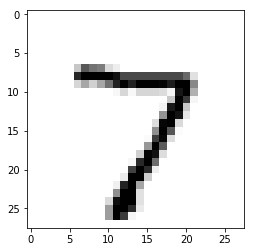

labels(one-hot) :  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
number :  7


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# Tensorflow에 있는 MNIST 데이터를 이용하였음.
# image는 784 (28*28)개의 0.0~1.0 사이의 값으로 표현된 이미지
# label은 10개 (0~9) 까지의 class로 one_hot 데이터 형식
# train은 55000개, test는 10000개
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
print(np.shape(mnist.train.images))
print(np.shape(mnist.train.labels))
print(np.shape(mnist.test.images))
print(np.shape(mnist.test.labels))

# 데이터 구경하기
plt.imshow(mnist.test.images[0].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()
print("labels(one-hot) : ", mnist.test.labels[0])
print("number : ", np.argmax(mnist.test.labels[0]))

실습1 에 공통된 코드인 러닝하는 함수를 따로 분리하였으니, 아래 부분을 코드를 최초로 실행시킨 후에
모델만 만들어서 코드를 실행해본다.

In [1]:
import random
import time

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learningRate = 0.01
trainingEpochs = 10
batchSize = 100

def set_hyper_parameters(learning_rate, training_epochs, batch_size):
    global learningRate
    global trainingEpochs
    global batchSize
    learningRate = learning_rate
    trainingEpochs = training_epochs
    batchSize = batch_size

def get_accuracy(sess, x_data, y_data):
    return sess.run(accuracy, feedict = {X: x_data, Y: y_data})

def run_train_model(sess):
    print("===== Learning Started... =====")
    sess.run(tf.global_variables_initializer())

    start_time = time.time()

    for epoch in range(trainingEpochs + 1):
        total_batch = int(mnist.train.num_examples / batchSize)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batchSize)
            sess.run(optimizer, feed_dict={X: batch_xs, Y: batch_ys})

        train_cost, train_acc = sess.run([cost, accuracy], feed_dict={X: mnist.train.images, Y: mnist.train.labels})
        test_cost, test_acc = sess.run([cost, accuracy], feed_dict={X: mnist.test.images, Y: mnist.test.labels})

        if((epoch % (trainingEpochs/5)) == 0):
            print("[{0} epoch, {1:0.2f}s pass] [TEST_DATA] Cost: {2:0.5f} , Accuracy: {3:0.3f} %"
            .format(epoch, (time.time()-start_time), test_cost, test_acc * 100))
    
    train_cost, train_acc = sess.run([cost, accuracy], feed_dict={X: mnist.train.images, Y: mnist.train.labels})
    test_cost, test_acc = sess.run([cost, accuracy], feed_dict={X: mnist.test.images, Y: mnist.test.labels})

    print("===== Learning Finished... =====")
    print("[Hyper Parameters] Learing Rate: %f, epoch: %d, batch_size: %d" % (learningRate, trainingEpochs, batchSize))
    print("[Accuracy gap: %.3f per, Learning time: %.2fs]" % (((train_acc-test_acc) * 100), (time.time()-start_time)))
    print("[TRAIN_DATA] Cost: {0:0.5f} , Accuracy: {1:0.3f} %".format(train_cost, train_acc * 100))
    print("[TEST_DATA] Cost: {0:0.5f} , Accuracy: {1:0.3f} %".format(test_cost, test_acc * 100))

# [주의사항] 
# Evaluation def 을 사용하기 위해서는 다음과 같은 Tensor를 모두 정의해야 한다.

C:\Users\khj\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


#### 실습1-1) Logistic Classification (Regression)
이건 동작을 안하네..?

In [20]:
import random
import time

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
X_train = mnist.train.images
Y_train = mnist.train.labels

# 1. Logistic (regression) classification

# Hyper Parameters
learning_rate = 0.01
training_epochs = 15
batch_size = 100

n_features = 784
n_classes = 10

X = tf.placeholder(tf.float32, [None, n_features])
Y = tf.placeholder(tf.float32, [None, n_classes])

W = tf.Variable(tf.random_normal([n_features, n_classes]))
b = tf.Variable(tf.random_normal([n_classes]))

# Hypothesis using sigmoid : tf.div(1., 1. + tf.exp(tf.matmul(X, W) + b))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
#hypothesis = tf.div(1., 1. + tf.exp(tf.matmul(X, W) + b))
# Simplified cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y)*tf.log(1-hypothesis))
# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)

# logits = tf.matmul(X,W) + b
# cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y_train) #label must be one-hot
# cost = tf.reduce_mean(cost_i)
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis > 0.5
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32)) * 100

#launch the graph in a session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print("=== Learning Started ===")
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        current_cost, acc = sess.run([cost, accuracy], feed_dict={X: X_train, Y: Y_train})
        print('step : %04d, cost: %.5f, Accuracy: %.3f' % (epoch, current_cost, acc), "%")
            
    print('Learning finished.')
    # Test the model using test sets
    #print("Accuracy: %.3f " % accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
=== Learning Started ===
step : 0000, cost: nan, Accuracy: 90.000 %
step : 0001, cost: nan, Accuracy: 90.000 %
step : 0002, cost: nan, Accuracy: 90.000 %
step : 0003, cost: nan, Accuracy: 90.000 %
step : 0004, cost: nan, Accuracy: 90.000 %
step : 0005, cost: nan, Accuracy: 90.000 %
step : 0006, cost: nan, Accuracy: 90.000 %
step : 0007, cost: nan, Accuracy: 90.000 %
step : 0008, cost: nan, Accuracy: 90.000 %
step : 0009, cost: nan, Accuracy: 90.000 %
step : 0010, cost: nan, Accuracy: 90.000 %
step : 0011, cost: nan, Accuracy: 90.000 %
step : 0012, cost: nan, Accuracy: 90.000 %
step : 0013, cost: nan, Accuracy: 90.000 %
step : 0014, cost: nan, Accuracy: 90.000 %
Learning finished.


#### 실습1-2) Logistic Classification (Softmax)

In [19]:
# 실습 1-2) Logistic classification (Softmax classfier)
n_features = 784
n_classes = 10
X = tf.placeholder(tf.float32, [None, n_features])
Y = tf.placeholder(tf.float32, [None, n_classes])
W = tf.Variable(tf.random_normal([n_features, n_classes]))
b = tf.Variable(tf.random_normal([n_classes]))

set_hyper_parameters(learning_rate = 0.1, training_epochs = 50, batch_size = 100)

# case 1. Cross entropy
#logits = tf.matmul(X,W) + b
#hypothesis = tf.nn.softmax(logits)
#cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1)) 
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# case 2. fancy Softmax by logits
logits = tf.matmul(X,W) + b
cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = Y) #label must be one-hot
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learningRate).minimize(cost)

# Evaluation Model
is_correct = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

sess = tf.Session()

# Run with def
run_train_model(sess)

# ## Epoch / Batch_Size 변경

# ===== Learning Finished... =====
# [Hyper Parameters] Learing Rate: 0.100000, epoch: 15, batch_size: 100
# [Accuracy gap: -0.485 per, Learning time: 6.75s]
# [TRAIN_DATA] Cost: 0.45354 , Accuracy: 88.955 %
# [TEST_DATA] Cost: 0.44991 , Accuracy: 89.440 %

# ===== Learning Finished... =====
# [Hyper Parameters] Learing Rate: 0.100000, epoch: 50, batch_size: 100
# [Accuracy gap: 0.499 per, Learning time: 20.62s]
# [TRAIN_DATA] Cost: 0.32619 , Accuracy: 91.429 %
# [TEST_DATA] Cost: 0.35714 , Accuracy: 90.930 %

# ===== Learning Finished... =====
# [Hyper Parameters] Learing Rate: 0.100000, epoch: 50, batch_size: 500
# [Accuracy gap: -0.337 per, Learning time: 16.11s]
# [TRAIN_DATA] Cost: 0.51811 , Accuracy: 87.973 %
# [TEST_DATA] Cost: 0.51571 , Accuracy: 88.310 %


# ## Learning Rate 변경

# ===== Learning Stated... =====
# [0 epoch, 0.62s pass] [TEST_DATA] Cost: 5.48238 , Accuracy: 29.110 %
# [10 epoch, 4.62s pass] [TEST_DATA] Cost: 1.08241 , Accuracy: 77.560 %
# [20 epoch, 8.62s pass] [TEST_DATA] Cost: 0.82483 , Accuracy: 82.290 %
# [30 epoch, 12.60s pass] [TEST_DATA] Cost: 0.71857 , Accuracy: 84.290 %
# [40 epoch, 16.63s pass] [TEST_DATA] Cost: 0.65594 , Accuracy: 85.490 %
# [50 epoch, 20.64s pass] [TEST_DATA] Cost: 0.61241 , Accuracy: 86.260 %
# ===== Learning Finished... =====
# [Hyper Parameters] Learing Rate: 0.010000, epoch: 50, batch_size: 100
# [Accuracy gap: -0.555 per, Learning time: 20.70]
# [TRAIN_DATA] Cost: 0.63007 , Accuracy: 85.705 %
# [TEST_DATA] Cost: 0.61241 , Accuracy: 86.260 %

# ===== Learning Stated... =====
# [0 epoch, 0.62s pass] [TEST_DATA] Cost: 1.24081 , Accuracy: 74.940 %
# [10 epoch, 4.63s pass] [TEST_DATA] Cost: 0.49364 , Accuracy: 88.260 %
# [20 epoch, 8.62s pass] [TEST_DATA] Cost: 0.41648 , Accuracy: 89.870 %
# [30 epoch, 12.54s pass] [TEST_DATA] Cost: 0.38182 , Accuracy: 90.370 %
# [40 epoch, 16.58s pass] [TEST_DATA] Cost: 0.35793 , Accuracy: 90.720 %
# [50 epoch, 20.59s pass] [TEST_DATA] Cost: 0.34203 , Accuracy: 91.000 %
# ===== Learning Finished... =====
# [Hyper Parameters] Learing Rate: 0.100000, epoch: 50, batch_size: 100
# [Accuracy gap: 0.369 per, Learning time: 20.65s]
# [TRAIN_DATA] Cost: 0.32351 , Accuracy: 91.369 %
# [TEST_DATA] Cost: 0.34203 , Accuracy: 91.000 %

===== Learning Stated... =====
[0 epoch, 0.62s pass] [TEST_DATA] Cost: 1.24081 , Accuracy: 74.940 %
[10 epoch, 4.63s pass] [TEST_DATA] Cost: 0.49364 , Accuracy: 88.260 %
[20 epoch, 8.62s pass] [TEST_DATA] Cost: 0.41648 , Accuracy: 89.870 %
[30 epoch, 12.54s pass] [TEST_DATA] Cost: 0.38182 , Accuracy: 90.370 %
[40 epoch, 16.58s pass] [TEST_DATA] Cost: 0.35793 , Accuracy: 90.720 %
[50 epoch, 20.59s pass] [TEST_DATA] Cost: 0.34203 , Accuracy: 91.000 %
===== Learning Finished... =====
[Hyper Parameters] Learing Rate: 0.100000, epoch: 50, batch_size: 100
[Accuracy gap: 0.369 per, Learning time: 20.65s]
[TRAIN_DATA] Cost: 0.32351 , Accuracy: 91.369 %
[TEST_DATA] Cost: 0.34203 , Accuracy: 91.000 %


#### 실습1-3) Deep + Wide NN
Deep + Wide NN (5 Layers + 128 hide)

In [3]:
n_features = 784
n_classes = 10
hide = 128

set_hyper_parameters(learning_rate = 0.1, training_epochs = 50, batch_size = 100)

X = tf.placeholder(tf.float32, [None, n_features])
Y = tf.placeholder(tf.float32, [None, n_classes])

W = tf.Variable(tf.random_normal([n_features, hide]), name='weight1')
b = tf.Variable(tf.random_normal([hide]), name='bias1')

H_W1 = tf.Variable(tf.random_normal([hide, hide]), name='weight2')
H_b1 = tf.Variable(tf.random_normal([hide]), name='bias2')

H_W2 = tf.Variable(tf.random_normal([hide, hide]), name='weight3')
H_b2 = tf.Variable(tf.random_normal([hide]), name='bias3')

H_W3 = tf.Variable(tf.random_normal([hide, hide]), name='weight4')
H_b3 = tf.Variable(tf.random_normal([hide]), name='bias4')

last_W = tf.Variable(tf.random_normal([hide, n_classes]), name='weight5')
last_b = tf.Variable(tf.random_normal([n_classes]), name='bias5')

layer1 = tf.sigmoid(tf.matmul(X, W) + b)
layer2 = tf.sigmoid(tf.matmul(layer1, H_W1) + H_b1)
layer3 = tf.sigmoid(tf.matmul(layer2, H_W2) + H_b2)
layer4 = tf.sigmoid(tf.matmul(layer3, H_W3) + H_b3)

# fancy Softmax by logits
logits = tf.matmul(layer4, last_W) + last_b

cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = Y) #label must be one-hot
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learningRate).minimize(cost)

# Evaluation Model
is_correct = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

sess = tf.Session()

# Run with def
run_train_model(sess)

# # 1.3 기본
# ===== Learning Stated... =====
# [0 epoch, 1.38s pass] [TEST_DATA] Cost: 0.92668 , Accuracy: 69.830 %
# [10 epoch, 12.39s pass] [TEST_DATA] Cost: 0.37498 , Accuracy: 88.140 %
# [20 epoch, 23.23s pass] [TEST_DATA] Cost: 0.31178 , Accuracy: 90.270 %
# [30 epoch, 34.02s pass] [TEST_DATA] Cost: 0.28405 , Accuracy: 91.190 %
# [40 epoch, 44.73s pass] [TEST_DATA] Cost: 0.26554 , Accuracy: 91.880 %
# [50 epoch, 55.55s pass] [TEST_DATA] Cost: 0.25685 , Accuracy: 92.380 %
# ===== Learning Finished... =====
# [Hyper Parameters] Learing Rate: 0.100000, epoch: 50, batch_size: 100
# [Accuracy gap: 4.527 per, Learning time: 55.74s]
# [TRAIN_DATA] Cost: 0.11009 , Accuracy: 96.907 %
# [TEST_DATA] Cost: 0.25685 , Accuracy: 92.380 %

# # 1.3 + AdamOptimizer

# ===== Learning Stated... =====
# [0 epoch, 1.26s pass] [TEST_DATA] Cost: 0.68084 , Accuracy: 77.960 %
# [10 epoch, 12.62s pass] [TEST_DATA] Cost: 0.28464 , Accuracy: 91.250 %
# [20 epoch, 23.67s pass] [TEST_DATA] Cost: 0.24727 , Accuracy: 92.730 %
# [30 epoch, 34.70s pass] [TEST_DATA] Cost: 0.24068 , Accuracy: 93.110 %
# [40 epoch, 45.59s pass] [TEST_DATA] Cost: 0.24324 , Accuracy: 93.570 %
# [50 epoch, 56.54s pass] [TEST_DATA] Cost: 0.25110 , Accuracy: 93.630 %
# ===== Learning Finished... =====
# [Hyper Parameters] Learing Rate: 0.100000, epoch: 50, batch_size: 100
# [Accuracy gap: 5.706 per, Learning time: 56.73s]
# [TRAIN_DATA] Cost: 0.03375 , Accuracy: 99.336 %
# [TEST_DATA] Cost: 0.25110 , Accuracy: 93.630 %


# # 1.3 ReLU + Xavier (ReLU, Xavier를 따로 하면 학습이 안되네..?)

# ===== Learning Stated... =====
# [0 epoch, 1.19s pass] [TEST_DATA] Cost: 0.62437 , Accuracy: 82.610 %
# [10 epoch, 11.57s pass] [TEST_DATA] Cost: 0.18562 , Accuracy: 94.560 %
# [20 epoch, 22.19s pass] [TEST_DATA] Cost: 0.13110 , Accuracy: 96.270 %
# [30 epoch, 32.63s pass] [TEST_DATA] Cost: 0.10670 , Accuracy: 96.940 %
# [40 epoch, 43.46s pass] [TEST_DATA] Cost: 0.09446 , Accuracy: 97.150 %
# [50 epoch, 54.02s pass] [TEST_DATA] Cost: 0.08862 , Accuracy: 97.360 %
# ===== Learning Finished... =====
# [Hyper Parameters] Learing Rate: 0.010000, epoch: 50, batch_size: 100
# [Accuracy gap: 1.511 per, Learning time: 54.21s]
# [TRAIN_DATA] Cost: 0.04265 , Accuracy: 98.871 %
# [TEST_DATA] Cost: 0.08862 , Accuracy: 97.360 %

===== Learning Stated... =====
[0 epoch, 1.31s pass] [TEST_DATA] Cost: 1.01420 , Accuracy: 66.800 %
[10 epoch, 12.28s pass] [TEST_DATA] Cost: 0.38927 , Accuracy: 87.810 %
[20 epoch, 23.17s pass] [TEST_DATA] Cost: 0.32992 , Accuracy: 89.900 %
[30 epoch, 33.78s pass] [TEST_DATA] Cost: 0.29821 , Accuracy: 91.060 %
[40 epoch, 44.54s pass] [TEST_DATA] Cost: 0.28224 , Accuracy: 91.620 %
[50 epoch, 55.63s pass] [TEST_DATA] Cost: 0.27328 , Accuracy: 92.090 %
===== Learning Finished... =====
[Hyper Parameters] Learing Rate: 0.100000, epoch: 50, batch_size: 100
[Accuracy gap: 4.721 per, Learning time: 55.82s]
[TRAIN_DATA] Cost: 0.11593 , Accuracy: 96.811 %
[TEST_DATA] Cost: 0.27328 , Accuracy: 92.090 %


#### 실습1-4) ReLU, Xavier, Dropout, AdamOptimizer
ReLU + Xavier + Dropout 0.7 + AdamOptimizer를 # 1.3 과 동일한 모델에 적용해본 결과

In [2]:
n_features = 784
n_classes = 10
hide = 128
keep_prob = 0.7

set_hyper_parameters(learning_rate = 0.002, training_epochs = 50, batch_size = 100)

X = tf.placeholder(tf.float32, [None, n_features])
Y = tf.placeholder(tf.float32, [None, n_classes])

W = tf.get_variable('weight1', shape = [n_features, hide], 
                    initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([hide]), name='bias1')

H_W1 = tf.get_variable('weight2', shape = [hide, hide], 
                       initializer=tf.contrib.layers.xavier_initializer())
H_b1 = tf.Variable(tf.random_normal([hide]), name='bias2')

H_W2 = tf.get_variable('weight3', shape = [hide, hide],
                       initializer=tf.contrib.layers.xavier_initializer())
H_b2 = tf.Variable(tf.random_normal([hide]), name='bias3')

H_W3 = tf.get_variable('weight4', shape = [hide, hide],
                       initializer=tf.contrib.layers.xavier_initializer())
H_b3 = tf.Variable(tf.random_normal([hide]), name='bias4')

last_W = tf.get_variable('weight5', shape = [hide, n_classes],
                        initializer=tf.contrib.layers.xavier_initializer())
last_b = tf.Variable(tf.random_normal([n_classes]), name='bias5')

layer1 = tf.nn.relu(tf.matmul(X, W) + b)
layer1 = tf.nn.dropout(layer1, keep_prob=keep_prob)
layer2 = tf.nn.relu(tf.matmul(layer1, H_W1) + H_b1)
layer2 = tf.nn.dropout(layer2, keep_prob=keep_prob)
layer3 = tf.nn.relu(tf.matmul(layer2, H_W2) + H_b2)
layer3 = tf.nn.dropout(layer3, keep_prob=keep_prob)
layer4 = tf.nn.relu(tf.matmul(layer3, H_W3) + H_b3)
layer4 = tf.nn.dropout(layer4, keep_prob=keep_prob)

# fancy Softmax by logits
logits = tf.matmul(layer4, last_W) + last_b # dropout 1.0

cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = Y) #label must be one-hot
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.AdamOptimizer(learning_rate = learningRate).minimize(cost)

# Evaluation Model
is_correct = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

sess = tf.Session()

# Run with def
run_train_model(sess)

# # 1.4 ReLU + Xavier + AdamOptimizer
# ===== Learning Stated... =====
# [0 epoch, 1.25s pass] [TEST_DATA] Cost: 0.16134 , Accuracy: 95.200 %
# [10 epoch, 12.19s pass] [TEST_DATA] Cost: 0.11121 , Accuracy: 97.470 %
# [20 epoch, 23.43s pass] [TEST_DATA] Cost: 0.12800 , Accuracy: 97.490 %
# [30 epoch, 34.83s pass] [TEST_DATA] Cost: 0.12125 , Accuracy: 97.680 %
# [40 epoch, 46.38s pass] [TEST_DATA] Cost: 0.13925 , Accuracy: 97.900 %
# [50 epoch, 58.11s pass] [TEST_DATA] Cost: 0.14305 , Accuracy: 98.110 %
# ===== Learning Finished... =====
# [Hyper Parameters] Learing Rate: 0.001000, epoch: 50, batch_size: 100
# [Accuracy gap: 1.854 per, Learning time: 58.30s]
# [TRAIN_DATA] Cost: 0.00121 , Accuracy: 99.964 %
# [TEST_DATA] Cost: 0.14305 , Accuracy: 98.110 %


# # 1.4 RELU + Xavier + AdamOptimizer + Dropout 0.7
# # 여기서는 별로 안좋아졌는데.. 체감상 Overfitting되는 경우에 좋아질 것 같다.
# # 지금 모델이 생각보다 Deep, Wide가 잘 맞는것으로 보임

# ===== Learning Stated... =====
# [0 epoch, 2.09s pass] [TEST_DATA] Cost: 0.32104 , Accuracy: 90.930 %
# [10 epoch, 22.67s pass] [TEST_DATA] Cost: 0.17034 , Accuracy: 95.320 %
# [20 epoch, 41.70s pass] [TEST_DATA] Cost: 0.17134 , Accuracy: 95.750 %
# [30 epoch, 60.58s pass] [TEST_DATA] Cost: 0.15388 , Accuracy: 96.290 %
# [40 epoch, 79.49s pass] [TEST_DATA] Cost: 0.16610 , Accuracy: 96.340 %
# [50 epoch, 98.45s pass] [TEST_DATA] Cost: 0.19230 , Accuracy: 96.250 %
# ===== Learning Finished... =====
# [Hyper Parameters] Learing Rate: 0.002000, epoch: 50, batch_size: 100
# [Accuracy gap: 1.546 per, Learning time: 98.80s]
# [TRAIN_DATA] Cost: 0.07849 , Accuracy: 97.816 %
# [TEST_DATA] Cost: 0.18003 , Accuracy: 96.270 %

===== Learning Stated... =====
[0 epoch, 2.09s pass] [TEST_DATA] Cost: 0.32104 , Accuracy: 90.930 %
[10 epoch, 22.67s pass] [TEST_DATA] Cost: 0.17034 , Accuracy: 95.320 %
[20 epoch, 41.70s pass] [TEST_DATA] Cost: 0.17134 , Accuracy: 95.750 %
[30 epoch, 60.58s pass] [TEST_DATA] Cost: 0.15388 , Accuracy: 96.290 %
[40 epoch, 79.49s pass] [TEST_DATA] Cost: 0.16610 , Accuracy: 96.340 %
[50 epoch, 98.45s pass] [TEST_DATA] Cost: 0.19230 , Accuracy: 96.250 %
===== Learning Finished... =====
[Hyper Parameters] Learing Rate: 0.002000, epoch: 50, batch_size: 100
[Accuracy gap: 1.546 per, Learning time: 98.80s]
[TRAIN_DATA] Cost: 0.07849 , Accuracy: 97.816 %
[TEST_DATA] Cost: 0.18003 , Accuracy: 96.270 %


### 4. CNN (Convolutional N.N.)

> CNN은 이미지 인식에 뛰어난 성능을 보이는 모델로 이미지의 특정 부분마다 고양이의 뇌가 활성화되는 것이 다르다는 아이디어에서 착안했다. 이미지를 부분부분 잘라서 영향도를 계산하고, 최종적으로는 Fully Connected Layer를 통해 객체가 무엇인지 분류할 수 있다.

![](Image/image13.jpg)

* Convolution Layer

 전체이미지를 일정크기의 작은이미지를 Convolution한 값으로 새로운 필터이미지 N개를 생성한다. 이때 이미지 크기는 몇으로 할지, Stride(이미지를 건너뛰는 값)를 몇으로 할지 결정하면 Output의 크기가 결정된다. 각 필터에 사용된 Weight를 학습하여 실제로 최종 레이어에서 모든 Output을 기준으로 예측할 수 있다.
 
* MAX Pooling
 
 Sampling 또는 Resizing으로 이미지 크기를 작게 만들어 학습시간 단축 시키는 효과 및 다양한 형태의 이미지를 인식하는 것을 목표로 한다.
 
* Convolution Layer + Maxpooling Layer

 CNN에서는 이미지를 다양한 형태의 이미지로 재생성하고 이를 학습하여 각각의 Weight는 NN를 통해 구한다. 아직 어떤 모델로 구성하는 것이 효율적인지는 밝혀지지 않았지만 이런식으로 모델을 Deep하게 구성한 모델이 이미지 분류가 잘 동작한다.
 
* Fully Connected Layer

 Conv, Maxpooling 등 필터를 통과한 후 각각의 수치들을 1차원 형식의 Array로 Flatten한 Layer를 통해 각각의 특징을 추출한 결과를 학습하여 결과를 도출한다. 이때 이 Fully Connected Layer도 Deep하게 학습할 수 있다. 결국 앞에서 여러가지 필터를 적용시킨 것은 특징을 도출한 것이고, 결국 각각의 요소에 대해 Deep Learning을 한다.

### (실습2) CNN을 이용하여 MNIST 이미지 인식률 향상 

In [2]:
# Lab 11 MNIST and Convolutional Neural Network

# hyper parameters
set_hyper_parameters(learning_rate = 0.001, training_epochs = 15, batch_size = 100)

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 10])

# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
#    Conv     -> (?, 28, 28, 32)
#    Pool     -> (?, 14, 14, 32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')

# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
#    Conv      ->(?, 14, 14, 64)
#    Pool      ->(?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')
L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])

# Final FC 7x7x64 inputs -> 10 outputs
W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, W3) + b

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learningRate).minimize(cost)

# Evaluation Model
is_correct = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

sess = tf.Session()
# Run with def
run_train_model(sess)

===== Learning Started... =====
[0 epoch, 47.13s pass] [TEST_DATA] Cost: 0.10575 , Accuracy: 96.840 %
[3 epoch, 188.83s pass] [TEST_DATA] Cost: 0.05495 , Accuracy: 98.070 %
[6 epoch, 329.00s pass] [TEST_DATA] Cost: 0.04381 , Accuracy: 98.490 %
[9 epoch, 466.75s pass] [TEST_DATA] Cost: 0.03744 , Accuracy: 98.730 %
[12 epoch, 607.46s pass] [TEST_DATA] Cost: 0.05556 , Accuracy: 98.330 %
[15 epoch, 745.34s pass] [TEST_DATA] Cost: 0.04866 , Accuracy: 98.630 %
===== Learning Finished... =====
[Hyper Parameters] Learing Rate: 0.001000, epoch: 15, batch_size: 100
[Accuracy gap: 0.808 per, Learning time: 764.45s]
[TRAIN_DATA] Cost: 0.01563 , Accuracy: 99.438 %
[TEST_DATA] Cost: 0.04866 , Accuracy: 98.630 %


### 5. RNN (Recurrent N.N.)

![](Image/image14.jpg)

* Sequence data

 이전 상태의 데이터가 현재 상태에 영향을 미치는 연속적인 데이터 형태에서
 잘 동작하는 모델에 대해서 알아보고자 한다.

* Recurrent Neural Network (RNN)

 이전 상태의 값 Ht-1과 현재의 입력값 Xt 로 새로운 상태의값 Ht를 만들어내는
 수식으로 이루어지며, tanh를 통과하여 -1~1 사이의 출력값을 만들어낸다.

* Recuurent Networks offer a lot of flexibility

 RNN은 조금 변형하여 많은 다양한 분야에 활용가능한데 대표적으로 형태에 따라 분류해보면
 one to many (image captioning - 이미지에 대한 설명)
 many to one (Sentiment classification - 문장을 하나의 감정으로)
 many to many (Machine translation - 번역) 등이 있다.

#  

![](Image/image15.jpg)

* Stacked RNN

 RNN 도 Layer를 Deep하게 층을 쌓아서 학습가능하다.

* Loss

 Loss function(수식은 정리안됨)은  sequence_loss 것을 이용하면 각각의 Output이 Y값과
 얼마나 다른지를 Cost를 계산해준다. 이것을 똑같이 Minimize하면 된다.

### (실습3) RNN을 이용한 주가 예측
 구글의 일일 주가 데이터 정보 (시작가, Low, High, Volume) 값으로 주가가 얼마에 종료되었는지 예측하는 것으로 실습을  해본다.

C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Hyun-Jin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWa

Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which supports all the feature this cell currently has. Please replace the existing code with tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell').
[step: 0] loss: 214.6417236328125
[step: 100] loss: 1.328886866569519
[step: 200] loss: 1.1567217111587524
[step: 300] loss: 1.0068023204803467
[step: 400] loss: 0.8863711953163147
[step: 500] loss: 0.8043670654296875
RMSE: 0.05568068474531174


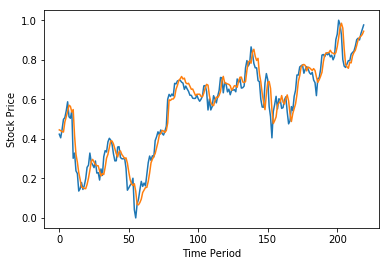

In [1]:
'''
This script shows how to predict stock prices using a basic RNN
'''
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

def MinMaxScaler(data):
    ''' Min Max Normalization

    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]

    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]

    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html

    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)


# train Parameters
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

# Open, High, Low, Volume, Close
xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)

# train/test split
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]  # Index from [train_size - seq_length] to utilize past sequence

# Scale each
train_set = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)

# build datasets
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]  # Next close price
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

# input place holders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

# build a LSTM network
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(outputs[:, -1], output_dim, activation_fn=None)  # We use the last cell's output

# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations + 1):
        _, step_loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})

        if(i % 100 == 0) : 
            print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    rmse_val = sess.run(rmse, feed_dict={targets: testY, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))

    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()